<a href="https://colab.research.google.com/github/DMounikaaa/College-Portfolio/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy nltk scikit-learn flask streamlit lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.1 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=02221ffbb439a03f2a30db43962da446eedb1ea750322932e8c4fda742ddb45d
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fake.csv to Fake.csv
Saving True.csv to True.csv


In [ ]:
import pandas as pd

# Load the datasets
df_fake = pd.read_csv("Fake.csv")
df_real = pd.read_csv("True.csv")

# Add labels
df_fake['label'] = 0  # Fake news
df_real['label'] = 1  # Real news

# Combine and shuffle
df = pd.concat([df_fake, df_real])
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
print(df.columns)
df.head()

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')


,title,text,subject,date,label
0,Britain's May 'deeply concerned' over reports ...,LONDON (Reuters) - British Prime Minister Ther...,worldnews,"October 30, 2017",1
1,House overwhelmingly backs NATO mutual defense,WASHINGTON (Reuters) - The U.S. House of Repre...,politicsNews,"June 27, 2017",1
2,U.S. embassy in Moscow says locked out of dipl...,MOSCOW (Reuters) - The U.S. embassy in Moscow ...,politicsNews,"July 31, 2017",1
3,American fanfare for Canada's PM raises eyebro...,TORONTO (Reuters) - The attention paid by Amer...,politicsNews,"March 11, 2016",1
4,WILL AND GRACE Writers Explain How Their HATE ...,When Will & Grace creators David Kohan and Max...,politics,"Sep 25, 2017",0


<Axes: title={'center': 'Real vs Fake News'}, xlabel='label'>

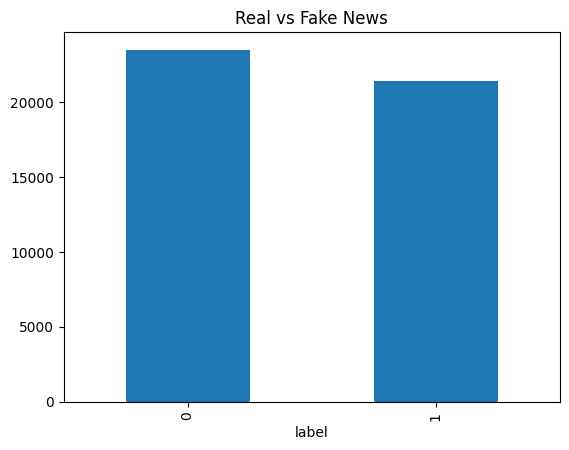

In [ ]:
df['label'].value_counts().plot(kind='bar', title='Real vs Fake News')

In [ ]:
print(df.isnull().sum())

title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [ ]:
print(df['text'][0])  # View a sample article

LONDON (Reuters) - British Prime Minister Theresa May is deeply concerned by media reports about the alleged misconduct of staff in parliament and believes any unwanted sexual behavior is  completely unacceptable , her spokesman said on Monday.  She is deeply concerned at the recent media reports regarding the alleged mistreatment of staff by some members of parliament,  her spokesman told reporters.  She has been clear that any unwanted sexual behavior is completely unacceptable in any walk of life and she strongly believes it s important that those working in parliament are treated properly and fairly.  


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import shutil
shutil.rmtree('/root/nltk_data/tokenizers/punkt', ignore_errors=True)
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = re.sub(r'\W', ' ', text)       # Remove non-word characters
    text = re.sub(r'\d+', '', text)       # Remove digits
    text = text.lower()                   # Lowercase
    tokens = text.split()                 # Simple tokenizer
    filtered = [stemmer.stem(w) for w in tokens if w not in stop_words]
    return ' '.join(filtered)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['clean_text'] = df['text'].apply(preprocess)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9875278396436525
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4699
           1       0.98      0.99      0.99      4281

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [ ]:
import pickle

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [ ]:
pip install streamlit

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Create input box
news_input = widgets.Textarea(
    value='',
    placeholder='Paste a news article or headline here...',
    description='News:',
    layout=widgets.Layout(width='100%', height='100px')
)

# Create button
button = widgets.Button(description="Check")

# Output area
output = widgets.Output()

# Define action
def on_button_click(b):
    with output:
        output.clear_output()
        cleaned = preprocess(news_input.value)
        vectorized = vectorizer.transform([cleaned])
        prediction = model.predict(vectorized)[0]
        result = "✅ Real News" if prediction == 1 else "❌ Fake News"
        print(result)

button.on_click(on_button_click)

# Display widgets
display(news_input, button, output)

Textarea(value='', description='News:', layout=Layout(height='100px', width='100%'), placeholder='Paste a news…

Button(description='Check', style=ButtonStyle())

Output()